In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro
from scipy.stats import kruskal 
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Получить и обработать данные

In [212]:
# Сборка всех данных в один датафрейм

import glob
import os

folder_path = 'dataFolder'

files = glob.glob(os.path.join(folder_path, 'atp_matches_*.csv'))
data_list = [pd.read_csv(file) for file in files]

In [213]:
files

['dataFolder\\atp_matches_1968.csv',
 'dataFolder\\atp_matches_1969.csv',
 'dataFolder\\atp_matches_1970.csv',
 'dataFolder\\atp_matches_1971.csv',
 'dataFolder\\atp_matches_1972.csv',
 'dataFolder\\atp_matches_1973.csv',
 'dataFolder\\atp_matches_1974.csv',
 'dataFolder\\atp_matches_1975.csv',
 'dataFolder\\atp_matches_1976.csv',
 'dataFolder\\atp_matches_1977.csv',
 'dataFolder\\atp_matches_1978.csv',
 'dataFolder\\atp_matches_1979.csv',
 'dataFolder\\atp_matches_1980.csv',
 'dataFolder\\atp_matches_1981.csv',
 'dataFolder\\atp_matches_1982.csv',
 'dataFolder\\atp_matches_1983.csv',
 'dataFolder\\atp_matches_1984.csv',
 'dataFolder\\atp_matches_1985.csv',
 'dataFolder\\atp_matches_1986.csv',
 'dataFolder\\atp_matches_1987.csv',
 'dataFolder\\atp_matches_1988.csv',
 'dataFolder\\atp_matches_1989.csv',
 'dataFolder\\atp_matches_1990.csv',
 'dataFolder\\atp_matches_1991.csv',
 'dataFolder\\atp_matches_1992.csv',
 'dataFolder\\atp_matches_1993.csv',
 'dataFolder\\atp_matches_1994.csv',
 

In [214]:
data_list

[     tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
 0     1968-2029       Dublin   Grass       32.0             A      19680708   
 1     1968-2029       Dublin   Grass       32.0             A      19680708   
 2     1968-2029       Dublin   Grass       32.0             A      19680708   
 3     1968-2029       Dublin   Grass       32.0             A      19680708   
 4     1968-2029       Dublin   Grass       32.0             A      19680708   
 ...         ...          ...     ...        ...           ...           ...   
 4372  1968-T167        Hanau     NaN        NaN             A      19680822   
 4373  1968-T167        Hanau     NaN        NaN             A      19680822   
 4374  1968-T168     Narberth    Hard        NaN             A      19681002   
 4375  1968-T168     Narberth    Hard        NaN             A      19681002   
 4376  1968-T168     Narberth    Hard        NaN             A      19681002   
 
       match_num  winner_id  winner_se

In [215]:
fullData = pd.concat(data_list, ignore_index=True, join='outer')

In [28]:
# cannot convert float NaN to integer
# fullData['tourney_id'].str.extract(r'(\d{4})').astype(int)
# mask = fullData['tourney_id'].str.extract(r'(\d{4})').isnull().values
# fullData[mask]['tourney_id']
#Сделать проверку файлов на то, чтобы такого не было?..Лучше просто удалить все такие строчки

In [95]:
# Было нужно для всех файлов, а не только одиночный разряд
# mask = fullData['tourney_id'].str.extract(r'(\d{4})').isnull().values
# fullData[mask]['tourney_id']
# mask
# AntyMask = pd.array([not index for index in mask])
# fullData = fullData[AntyMask]

In [96]:
fullData['year'] = fullData['tourney_id'].str.extract(r'(\d{4})').astype(int)
fullData.to_csv('ConnectedData/contactedData.csv', index=False)

In [216]:
contactedData = pd.read_csv('ConnectedData/contactedData.csv')
len(contactedData)

191920

In [99]:
contactedData

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191915,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4.0,D,20230204,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0,2023
191916,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0,2023
191917,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0,2023
191918,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0,2023


###### Проверка на информативность признаков (считаем бесполезным колонки с 90% встречаемостью признака или 90% уникальных значений, так как существенной информации они не несут. В каждом случае можно рассмотреть колонку отдельно)

In [101]:
badColumns = []

for col in contactedData.columns:
    mostUsefull = contactedData[col].value_counts(normalize=True).max()
    uniq = contactedData[col].nunique() / contactedData[col].count()

    if mostUsefull > 0.9:
        badColumns.append(col)
    if uniq > 0.9:
        badColumns.append(col)
if not badColumns:
    print("Нет бесполезных признаков")
else:
    print(badColumns)

Нет бесполезных признаков


###### Удалить пропуски

In [103]:
spaces = 100 * contactedData.isnull().mean().sort_values(ascending=False)[contactedData.isnull().mean().sort_values(ascending=False) > 0]
spaces

winner_entry          91.276053
loser_entry           85.189662
loser_seed            81.190600
winner_seed           63.043977
minutes               51.924239
w_2ndWon              50.482493
w_1stWon              50.482493
w_1stIn               50.482493
w_svpt                50.482493
w_df                  50.482493
l_1stWon              50.482493
l_2ndWon              50.482493
w_bpFaced             50.482493
l_1stIn               50.482493
w_bpSaved             50.482493
l_svpt                50.482493
l_bpSaved             50.482493
l_ace                 50.482493
l_bpFaced             50.482493
l_SvGms               50.481972
l_df                  50.481972
w_ace                 50.481972
w_SvGms               50.481972
loser_rank_points     44.087120
winner_rank_points    43.238850
loser_rank            22.994998
winner_rank           18.633285
loser_ht              15.455919
winner_ht              8.809921
loser_age              2.426532
surface                1.557941
winner_a

50% процентов пропущенных значений (или сравнимые цифры) - это очень много. Удалим все такие столбцы. Можно взять цифру 52% и меньше, чтобы убрать те колонки, где пропущена половина или около того

In [104]:
contactedData = contactedData.dropna(axis=1, thresh=(0.48 * contactedData.shape[0]))

In [105]:
contactedData

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,Doug Smith,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,Louis Pretorius,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,Cecil Pedlow,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,Tom Okker,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,Armistead Neely,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191915,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4.0,D,20230204,5,202335,Raphael Calzi,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0,2023
191916,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,1,117365,Petros Chrysochos,R,...,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0,2023
191917,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,2,121411,Moez Echargui,R,...,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0,2023
191918,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,4,144949,Menelaos Efstathiou,R,...,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0,2023


In [133]:
# Тест Шапиро на нормальность

def shapiro_test(sample_a, sample_b, alpha=0.05):
    H0 = 'Распределения в обеих группах нормальные'
    H1 = 'Распределение в одной или обеих группах отлично от нормального'

    shapiro_result_a = shapiro(sample_a)
    shapiro_result_b = shapiro(sample_b)

    print(f'alpha: {alpha}')
    print('p-value sample A', round(shapiro_result_a.pvalue, 2))
    print('p-value sample B', round(shapiro_result_b.pvalue, 2))

    if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
        print("Отвергаем нулевую гипотезу H0: {}".format(H0))
        print("Альтернативная гипотеза. H1: {}".format(H1))
    else:
        print("Принимаем нулевую гипотезу. {}".format(H0))

# Пример использования:
# shapiro_test(more20['deviation'], less20['deviation'], alpha=0.05)

## Задача 1 a)

> Проверьте следующие утверждения - Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

In [111]:
data1A = contactedData.copy()
data1A

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,Doug Smith,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,Louis Pretorius,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,Cecil Pedlow,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,Tom Okker,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,Armistead Neely,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191915,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4.0,D,20230204,5,202335,Raphael Calzi,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0,2023
191916,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,1,117365,Petros Chrysochos,R,...,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0,2023
191917,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,2,121411,Moez Echargui,R,...,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0,2023
191918,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,4,144949,Menelaos Efstathiou,R,...,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0,2023


In [112]:
Игроки, отличавшиеся на 20 рангов от противника / игроки, отличавшиеся менее чем на 20 рангов
data1A = data1A[['year', 'match_num', 'winner_id', 'winner_rank', 'loser_id', 'loser_rank']].dropna()
data1A['Diff20'] = np.where(abs(data1A['winner_rank'] - data1A['loser_rank']) > 20, 1, 0)

# Размеры:
data1A.Diff20.value_counts()

1    106767
0     37093
Name: Diff20, dtype: int64

In [113]:
# Подсчет производительности игроков
def productivity(df):
    losses_count, wins_count = (df['loser_id'].value_counts(), df['winner_id'].value_counts()) 
    total_games = wins_count.add(losses_count, fill_value=0).astype(int)
    player_productivity = pd.DataFrame({
       'player_id': total_games.index,
       'wins': wins_count,
       'losses': losses_count,
       'total': total_games
    }).reset_index(drop=True)
    player_productivity['wins'].fillna(0, inplace=True)
    player_productivity['losses'].fillna(0, inplace=True)
    player_productivity['wins'] = player_productivity['wins'].astype(int)
    player_productivity['losses'] = player_productivity['losses'].astype(int)
    player_productivity['expected_wins'] = player_productivity['total'] * 0.5
    player_productivity['deviation'] = player_productivity['wins'] - player_productivity['expected_wins']
    return player_productivity.sort_values(by='total', ascending=False)

In [118]:
Difflow20 = productivity(data1A[data1A['Diff20'] == 0])
Diffmore20 = productivity(data1A[data1A['Diff20'] == 1])

In [122]:
Diffmore20.head()

,player_id,wins,losses,total,expected_wins,deviation
2028,103819,821,103,924,462.0,359.0
2397,104745,694,88,782,391.0,303.0
1150,101736,614,132,746,373.0,241.0
2461,104925,661,73,734,367.0,294.0
469,100656,626,86,712,356.0,270.0


In [120]:
Difflow20.head()

,player_id,wins,losses,total,expected_wins,deviation
1157,103819,441,177,618,309.0,132.0
1330,104925,437,141,578,289.0,148.0
1306,104745,385,139,524,262.0,123.0
350,100656,325,145,470,235.0,90.0
176,100284,277,138,415,207.5,69.5


In [127]:
# Рассчитать среднее отклонение для каждой выборки
print('Cреднее отклонение для игроков с разницей 20+: ', Diffmore20.deviation.abs().mean())
print('Cреднее отклонение для игроков с разницей 20-: ', Difflow20.deviation.abs().mean())


# Если в первой выборке с разницей 20 позиций+ среднее отклонение значительно выше, то это подтверждает гипотезу о 
# большей вероятности выигрыша у игроков с более высоким рангом.

Cреднее отклонение для игроков с разницей 20+:  7.229697132136157
Cреднее отклонение для игроков с разницей 20-:  2.967251461988304


Выборки статистически независимы, так как не содержат одинаковых значений.
В данных условиях можно выбрать t-тест или непараметрический U-тест Манна-Уитни. Выберем второй: https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8

In [128]:
# Тест Мана-Уитни (односторонний U-теста Манна-Уитни)
s_A = Diffmore20.deviation
s_B = Difflow20.deviation
alpha = 0.05
stat, p = mannwhitneyu(s_A, s_B, alternative='greater')


print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

U-статистика: 2221913.5
p-значение: 1.0


In [129]:
# гипотезы: Нулевая и Альтернативная
H0 = 'Среднее отклонений Diffmore20 не больше медианы Difflow20'
H1 = 'Среднее отклонений Difflow20 больше медианы Difflow20'
print(H1)
print(H0)

Среднее отклонений Difflow20 больше медианы Difflow20
Среднее отклонений Diffmore20 не больше медианы Difflow20


In [132]:
# Сравнение p-значения с уровнем значимости
p < alpha

False

Не отвергаем нулевую гипотезу: Среднее отклонений Diffmore20 не больше медианы Difflow20 при a = 0.05.

In [134]:
shapiro_test(Diffmore20.deviation, Difflow20.deviation, alpha=0.05)

alpha: 0.05
p-value sample A 0.0
p-value sample B 0.0
Отвергаем нулевую гипотезу H0: Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


#### Вывод по задаче 1 а)

Проверка тестом Мана-Уитни:

* Нулевая гипотеза (вероятность победы не выше в группе с разницей рангов >20):Среднее отклонений для Diffmore20 не больше среднего для выборки Difflow20
* Альтернативная гипотеза (вероятность победы выше в группе с разницей рангов >20):Среднее отклонений для Diffmore20 больше среднего для выборки Difflow20
* Не отвергаем нулевую гипотезу: Среднее отклонений для more20 не больше медианы для выборки less20 при a = 0.05.

## Задача 1 b)
>Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

In [136]:

data1B = contactedData.copy()
data1B = data1B[['year', 'match_num', 'winner_id', 'winner_rank', 'loser_id', 'loser_rank']].dropna()

# Бнарный признак window5, который указывает, попадает ли разница рангов в окно [-5, 5]
data1B['window5'] = data1B.apply(
    lambda row: 'in' if -5 <= (row['winner_rank'] - row['loser_rank']) <= 5 else 'out', 
    axis=1
)
data1B.window5.value_counts()

out    133840
in      10020
Name: window5, dtype: int64

In [138]:
# Группировка по 'winner_id', 'year' и 'window5', подсчет количества побед с 1984 по 2022
winCounts = data1B[(data1B['year'] >= 1984) & (data1B['year'] <= 2022)].groupby(['winner_id', 'year', 'window5']).size().reset_index(name='win_count')
# Среднее количество побед
averageWins = winCounts.groupby(['year', 'window5'])['win_count'].mean().reset_index()

# Разделение на группы 'in' и 'out'
averageWinsIn = averageWins[averageWins['window5'] == 'in'].reset_index(drop=True)
averageWinsOut = averageWins[averageWins['window5'] == 'out'].reset_index(drop=True)

### Shapiro

In [139]:
shapiro_test(averageWinsIn.win_count, averageWinsOut.win_count, alpha=0.05)

alpha: 0.05
p-value sample A 0.57
p-value sample B 0.0
Отвергаем нулевую гипотезу H0: Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [144]:
# Среднее количество побед в группе in5window
round(averageWinsIn.win_count.mean(), 4)

2.2991

In [145]:
# Среднее количество побед в группе out
round(averageWinsOut.win_count.mean(), 4)

10.3897

###### Тест Манна-Уитни (U-тест)

Позволяет провести одностороннюю проверку гипотезы о том, что среднее значение в одной выборке больше среднего значения в другой выборке. Подходит для статистически независимых выборок

In [149]:
# Уровень значимости
alpha = 0.05

# Проведение одностороннего U-теста Манна-Уитни
stat, p = mannwhitneyu(averageWinsIn.win_count, averageWinsOut.win_count, alternative='less')
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

U-статистика: 0.0
p-значение: 1.5393187778399125e-14


In [147]:
# гипотезы: Нулевая и Альтернативная
H0 = 'Среднее количество побед в out не больше, чем в группе in'
H1 = 'Среднее количество побед в out больше, чем в группе in'
print(H1)
print(H0)

Среднее количество побед в out больше, чем в группе in
Среднее количество побед в out не больше, чем в группе in


In [151]:
p < alpha

True

Отвергаем: Среднее количество побед в out не больше, чем в группе in

Принимаем: Среднее количество побед в out больше, чем в группе in

### Вывод по задаче 1 b)

Вывод: 

Если ранг игрока отличается на +-5 позиций, то вероятность победы бзначительно отличается (вероятность победы ниже) от гипотезы из предыдущего случая (никакой разницы).

## Задача 2
>Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

Количество сетов можно рассчитать, используя признак `score`

In [154]:
import re

data2 = contactedData.copy()
data2 = data2[['year', 'score', 'winner_id']].dropna()

# Признак с количеством сетов. Если явно не указан счет партии в сете, не учитываем его
def setsWithScores(score):
    sets = re.findall(r'\d+-\d+', score)
    return len(sets)

data2['Sets'] = data2['score'].apply(setsWithScores)
# Дубли
data2 = data2.drop_duplicates()

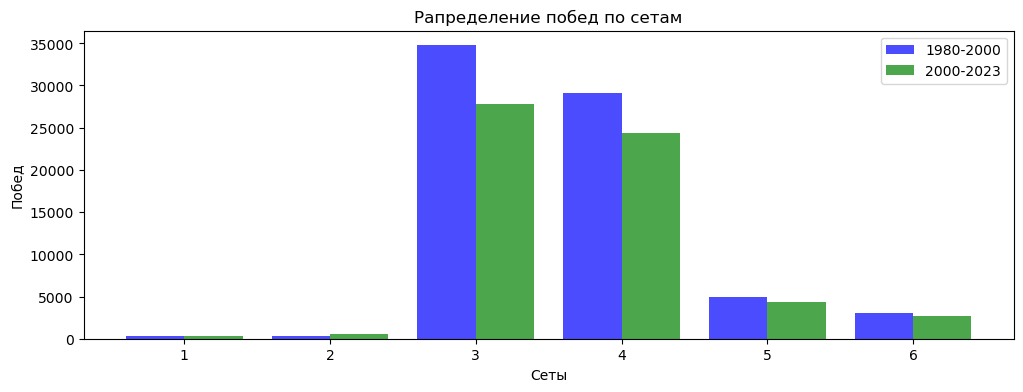

In [161]:
# Рапределение сетов. Фильтрация по годам
task_02_1980_2001 = data2[(data2['year'] >= 1980) & (data2['year'] <= 2001)].reset_index(drop=True)
task_02_2002_2023 = data2[(data2['year'] > 2001) & (data2['year'] <= 2023)].reset_index(drop=True)

positions = range(1, max(data2['Sets']) + 2, 1)

plt.figure(figsize=(12, 4))
plt.bar([pos - 0.2 for pos in positions], 
        task_02_1980_2001['Sets'].value_counts().sort_index(), 
        width=0.4, 
        color='blue', 
        alpha=0.7, 
        label='1980-2000')
plt.bar([pos + 0.2 for pos in positions], 
        task_02_2002_2023['Sets'].value_counts().sort_index(), 
        width=0.4, 
        color='green', 
        alpha=0.7, 
        label='2000-2023')

plt.title('Рапределение побед по сетам')
plt.xlabel('Сеты')
plt.ylabel('Побед')
plt.legend()
plt.show()

### Графическое описание распределений признака для каждой выборки

In [164]:
# Сравнение среднего количества побед
print(f"Среднее количество сетов побед 1980-2001: {task_02_1980_2001.Sets.mean()}, из {len(task_02_1980_2001.Sets)} партий")
print(f"Среднее количество сетов побед 2002-2023: {task_02_2002_2023.Sets.mean()}, из {len(task_02_2002_2023.Sets)} партий")

Среднее количество сетов побед 1980-2001: 2.6531740125141265, из 72558 партий
Среднее количество сетов побед 2002-2023: 2.668783561370551, из 60151 партий


###### Shapiro

In [166]:
shapiro_test(task_02_1980_2001.Sets, task_02_2002_2023.Sets, alpha=0.05)

alpha: 0.05
p-value sample A 0.0
p-value sample B 0.0
Отвергаем нулевую гипотезу H0: Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


Вообще, выборки распределены скорее нормально. Посмотрим подробнее:

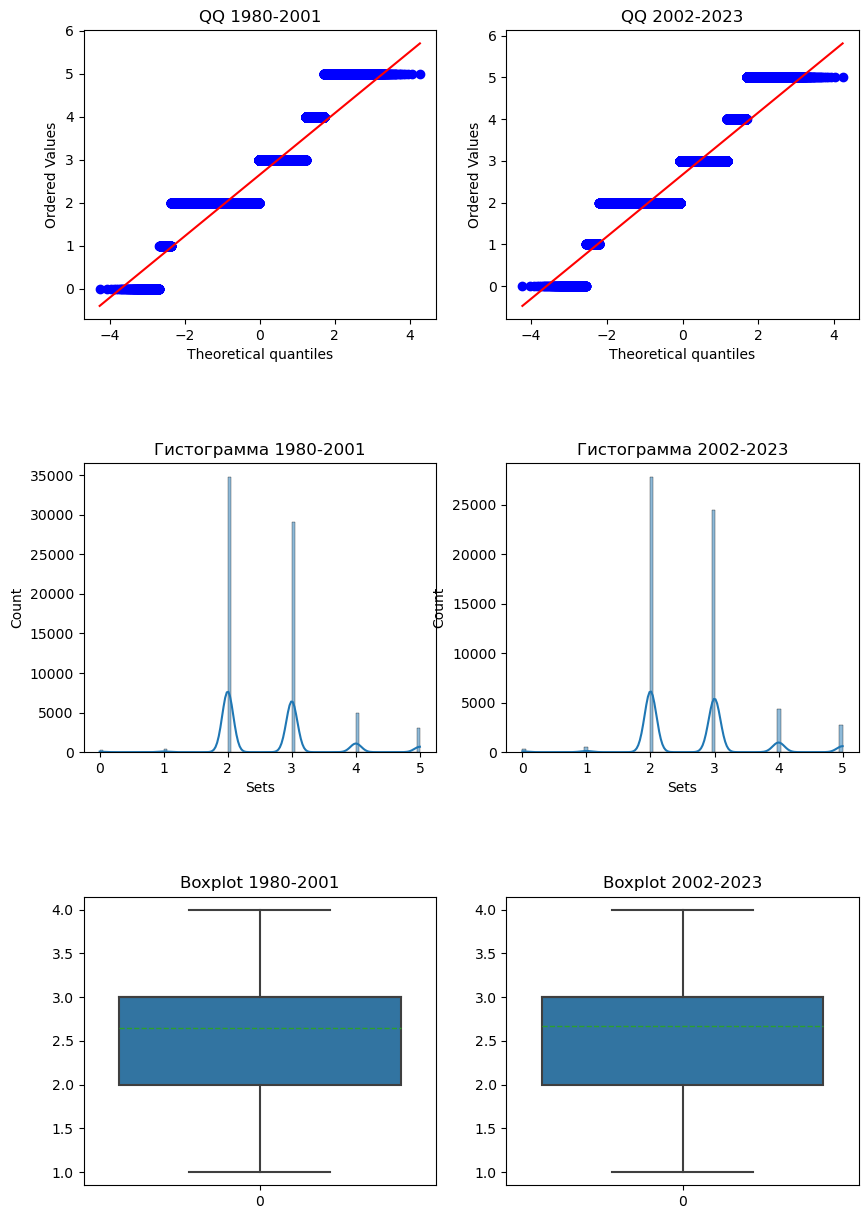

In [173]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)
stats.probplot(task_02_1980_2001.Sets, plot=axs[0, 0]) # qq plot
axs[0, 0].set_title('QQ 1980-2001')

stats.probplot(task_02_2002_2023.Sets, plot=axs[0, 1]) # qq plot
axs[0, 1].set_title('QQ 2002-2023')

sns.histplot(task_02_1980_2001.Sets, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Гистограмма 1980-2001')

sns.histplot(task_02_2002_2023.Sets, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Гистограмма 2002-2023')
    
# boxplot с отрисовкой среднего и медианы
sns.boxplot(task_02_1980_2001.Sets, ax=axs[2, 0], showmeans=True, meanline=True, showfliers=False)
axs[2, 0].set_title('Boxplot 1980-2001')

sns.boxplot(task_02_2002_2023.Sets, ax=axs[2, 1], showmeans=True, meanline=True, showfliers=False)
axs[2, 1].set_title('Boxplot 2002-2023')

plt.show()

###### Z тест
https://ru.wikipedia.org/wiki/Z-%D1%82%D0%B5%D1%81%D1%82

Подходит для независимых выборок большого размера с близким к нормальному распределением.

In [178]:
# Нулевая гипотеза: среднее значение первой выборки меньше или равно среднему значению второй выборки
# Альтернативная гипотеза: среднее значение первой выборки больше среднего значения второй выборки


from statsmodels.stats.weightstats import ztest # z-тест
from statsmodels.stats.proportion import proportions_ztest
z, p = ztest(task_02_1980_2001.Sets, task_02_2002_2023.Sets, alternative='larger')

In [182]:
print(f'Z-statistic: {round(z, 4)}')
print(f'P-value: {round(p, 4)}')

# Установим уровень значимости, например, 0.05
alpha = 0.05

# Проверим нулевую гипотезу
p < alpha

Z-statistic: -3.4642
P-value: 0.9997


False

### Выводы по задаче 2

Вопреки результату теста Шапиро считаем нормальным распределение количества сетов в выборках согласно графическим данным.
Z-тест позволяет утверждать, что среднее значение выборки 1980_2001 <= среднему значению выборки 2002-2023.

Верно ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? 
###### нет, не верно

### Задача 3

У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [185]:
data3 = contactedData.copy()
data3 = data3[['year', 'score', 'winner_id', 'best_of']].dropna()
data3 = data3[data3.best_of == 5]

# Признак с количеством сетов. Не учитываем сеты, где явно не указан счет партии
def setsWithScores(score):
    sets = re.findall(r'\d+-\d+', score)
    return len(sets)
data3['Sets'] = data3['score'].apply(setsWithScores)
# dubles
data3 = data3.drop_duplicates()

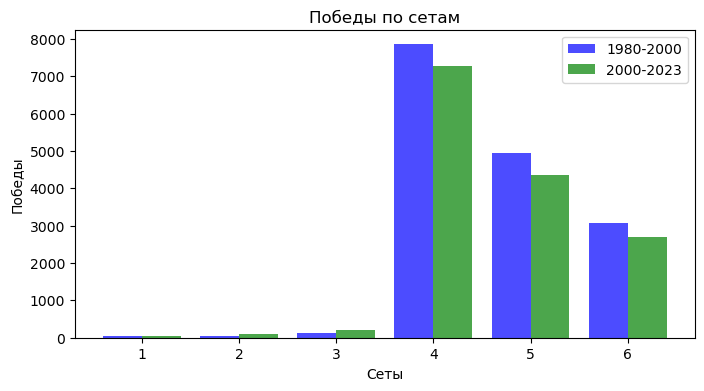

In [196]:
# Рапределение количества сетов best_of ==5, всего
# Фильтрация данных по годам
task_03_1980_2001 = data3[(data3['year'] >= 1980) & (data3['year'] <= 2001)].reset_index(drop=True)
task_03_2002_2023 = data3[(data3['year'] > 2001) & (data3['year'] <= 2023)].reset_index(drop=True)


positions = range(1, max(data3['Sets']) + 2, 1)


plt.figure(figsize=(8, 4))
plt.bar([pos - 0.2 for pos in positions], 
        task_03_1980_2001['Sets'].value_counts().sort_index(), 
        width=0.4, 
        color='blue', 
        alpha=0.7, 
        label='1980-2000')
plt.bar([pos + 0.2 for pos in positions], 
        task_03_2002_2023['Sets'].value_counts().sort_index(), 
        width=0.4, 
        color='green', 
        alpha=0.7, 
        label='2000-2023')

plt.title('Победы по сетам')
plt.xlabel('Сеты')
plt.ylabel('Победы')
plt.legend()
plt.show()

### Графическое описание распределений признака для каждой выборки

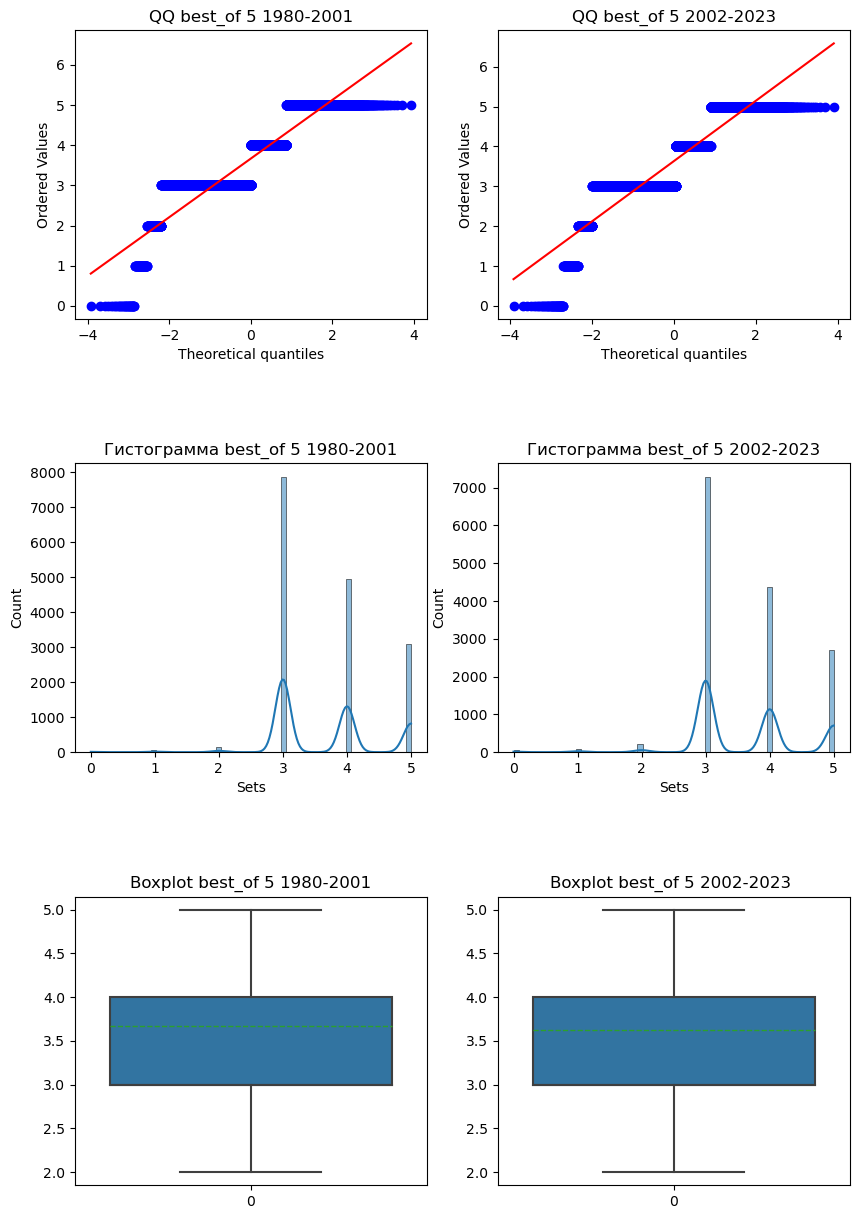

In [198]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)
stats.probplot(task_03_1980_2001.Sets, plot=axs[0, 0]) # qq plot
axs[0, 0].set_title('QQ best_of 5 1980-2001')

stats.probplot(task_03_2002_2023.Sets, plot=axs[0, 1]) # qq plot
axs[0, 1].set_title('QQ best_of 5 2002-2023')

sns.histplot(task_03_1980_2001.Sets, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Гистограмма best_of 5 1980-2001')

sns.histplot(task_03_2002_2023.Sets, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Гистограмма best_of 5 2002-2023')
    
# boxplot с отрисовкой среднего и медианы
sns.boxplot(task_03_1980_2001.Sets, ax=axs[2, 0], showmeans=True, meanline=True, showfliers=False)
axs[2, 0].set_title('Boxplot best_of 5 1980-2001')

sns.boxplot(task_03_2002_2023.Sets, ax=axs[2, 1], showmeans=True, meanline=True, showfliers=False)
axs[2, 1].set_title('Boxplot best_of 5 2002-2023 ')

plt.show()

###### Сравнение среднего количества побед

Среднее количество сетов для побед в периоде 1980-2001
Среднее количество сетов для побед в периоде 2002-2023

In [200]:
task_03_1980_2001.Sets.mean()

3.6685703643925756

In [201]:
len(task_03_1980_2001.Sets)

16109

In [202]:
task_03_2002_2023.Sets.mean()

3.628614191441595

In [203]:
len(task_03_2002_2023.Sets)

14699

### Shapiro

In [205]:
shapiro_test(task_03_1980_2001.Sets, task_03_2002_2023.Sets, alpha=0.05)

alpha: 0.05
p-value sample A 0.0
p-value sample B 0.0
Отвергаем нулевую гипотезу H0: Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


Вообще, это уже вторая задача, где тест Шапиро показывает, что выборки принимать за нормально распределённые нельзя вопреки графиеским данным. Будем считать, что распределение нормальное

### Z тест

In [208]:
# Нулевая гипотеза: среднее значение первой выборки <= среднему значению второй
# Альтернативная гипотеза: среднее значение первой выборки > среднего значения второй

# z-тест
z, p = ztest(task_03_1980_2001.Sets, task_03_2002_2023.Sets, alternative='larger')

print(f'Z-statistic: {z}')
print(f'P-value: {p}')

# Уровень значимости
alpha = 0.05

# Нулевая гипотеза
p < alpha

Z-statistic: 4.225681445684541
P-value: 1.1910939311081864e-05


True

Отвергаем нулевую гипотезу - есть достаточные доказательства, что среднее выборки 1980-2001 больше среднего 2002-2023

###### Выводы по задаче 3

Принята версия о нормальном распределении выборок вопреки результату теста Шапиро на основании графического распределения

Z тест позволяет утверждать, что среднее выборки 1980-2001 больше среднего 2002-2023
Среднее количество сетов для победы любого игрока уменьшается со временем. Верно.

## Задача_05

У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

1. Создайте новый признак, который будет отражать долю выигранных брейк-поинтов для каждого игрока в матче. Для этого используйте следующую формулу:

Доля выигранных брейк-поинтов = (wbpSaved + lbpSaved) / (wbpFaced + lbpFaced)

2. После этого разделите выборку на две группы: матчи, где игроки выиграли брейк-поинты больше или равно медианы, и матчи, где они выиграли меньше медианы.

3. Составьте таблицу сопряжённости, где строки будут представлять долю выигранных брейк-поинтов (выше/ниже медианы), а столбцы — исход матча (победа/поражение).

Надо для каждого игрока собрать данные о брейк-поинтах (колонки bpFaced и bpSaved) за минимум 10 лет подряд, отдельно для победных и проигранных матчей.
Посчитать долю выигранных брейк-поинтов (bpSaved / bpFaced) для каждого игрока, отдельно для победных и проигранных матчей по годам.
Можно сделать по принципе задания 4.

In [217]:
contactedData = contactedData[['year', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced']].dropna()

# Cоотношениt брейк-поинтов
contactedData['bp_ratio_winner'] = round((contactedData['w_bpSaved'] / contactedData['w_bpFaced'] * 100), 1)
contactedData['bp_ratio_loser'] = round((contactedData['l_bpSaved'] / contactedData['l_bpFaced'] * 100), 1)


contactedData = contactedData.dropna()

winners = contactedData[['year', 'winner_id', 'bp_ratio_winner']].rename(columns={'winner_id': 'id', 'bp_ratio_winner': 'bp_ratio'})
losers = contactedData[['year', 'loser_id', 'bp_ratio_loser']].rename(columns={'loser_id': 'id', 'bp_ratio_loser': 'bp_ratio'})

winners['result'] = 1
losers['result'] = 0
contactedData = contactedData.drop_duplicates()

contactedData = pd.concat([winners, losers], ignore_index=True)
contactedData = contactedData.drop_duplicates()

# Медиана показателя брейк-поинтов для победителей и проигравших
losers_median = losers.bp_ratio.median()
winners_median = winners.bp_ratio.median()

contactedData['breakpoints_level'] = (contactedData
                           .apply(lambda x: 
                                  'more median' if (x['bp_ratio'] >= winners_median and x['result'] == 1) else 
                                  'less median' if (x['bp_ratio'] < winners_median and x['result'] == 1) else 
                                  'more median' if (x['bp_ratio'] >= losers_median and x['result'] == 0) else 
                                  'less median' if (x['bp_ratio'] < losers_median and x['result'] == 0) else '', axis=1))

In [218]:
print(winners_median, losers_median)

66.7 53.3


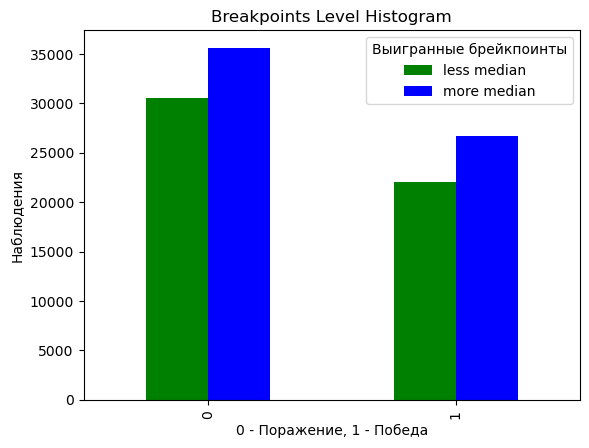

In [222]:
games = contactedData.groupby('result')['breakpoints_level'].value_counts().unstack().plot(kind='bar', color=['green', 'blue'])
games.set_title('Breakpoints Level Histogram')
plt.xlabel('0 - Поражение, 1 - Победа')
plt.ylabel('Наблюдения')
plt.legend(title='Выигранные брейкпоинты')
plt.show()

In [223]:
contactedData.groupby('result')['breakpoints_level'].value_counts().unstack()

breakpoints_level,less median,more median
result,,
0,30556,35615
1,22003,26705


###### парный Z-test

Парный Z-тест используется для сравнения средних значений двух связанных выборок. Его можно взять, чтобы понять, есть ли статистически значимая разница между этими двумя значениями.

In [225]:
count = contactedData.groupby('result')['breakpoints_level'].value_counts().unstack()
z, p = proportions_ztest(
    count=count['less median'],  
    nobs=count['more median'],  
    alternative='larger',
)

0: Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны
А: Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1

In [226]:
alpha = 0.05
p < alpha

True

Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1

###### Вывод
Доля выигранных брейк-поинтов с вероятностью победить в игре связана 